In [18]:
%matplotlib notebook

In [19]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
#Base Analysis
bikedata_day = 'bikedataday.csv'
bikedata_hours = 'bikedata_hour.csv'

In [21]:
bikedata_day_df = pd.read_csv(bikedata_day)
bikedata_day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [22]:
bikedata_hours_df = pd.read_csv(bikedata_hours)
bikedata_hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [23]:
#clean data
#fix up temperature
#Set up a key for the weather
#ride count vs holiday
#yearoveryear 10-19 
#finish plotting by tomorrow 

In [24]:
#RIDE COUNT VS HOLIDAY

In [25]:
#CasualUsers vs Registered Users on Holidays
#PieChart
casual_users = bikedata_day_df['casual']

casual_users

0      331
1      131
2      120
3      108
4       82
      ... 
726    247
727    644
728    159
729    364
730    439
Name: casual, Length: 731, dtype: int64

In [26]:
registered_users = bikedata_day_df['registered']
registered_users

0       654
1       670
2      1229
3      1454
4      1518
       ... 
726    1867
727    2451
728    1182
729    1432
730    2290
Name: registered, Length: 731, dtype: int64

In [44]:
#pie chart plotted out

weathersit_pie = bikedata_day_df.groupby(['weathersit'])
weathersit_pie.count()

registered_weathersit = weathersit_pie['registered'].sum()
casual_weathersit = weathersit_pie['casual'].sum()

ilocd_cas_weathersit = casual_weathersit.iloc[1]
ilocd_reg_weathersit = registered_weathersit.iloc[1]



In [45]:
registered_weathersit

weathersit
1    1811606
2     827082
3      33974
Name: registered, dtype: int64

In [40]:
ilocd_cas_weathersit

169776

In [42]:
ilocd_reg_weathersit

827082

<IPython.core.display.Javascript object>


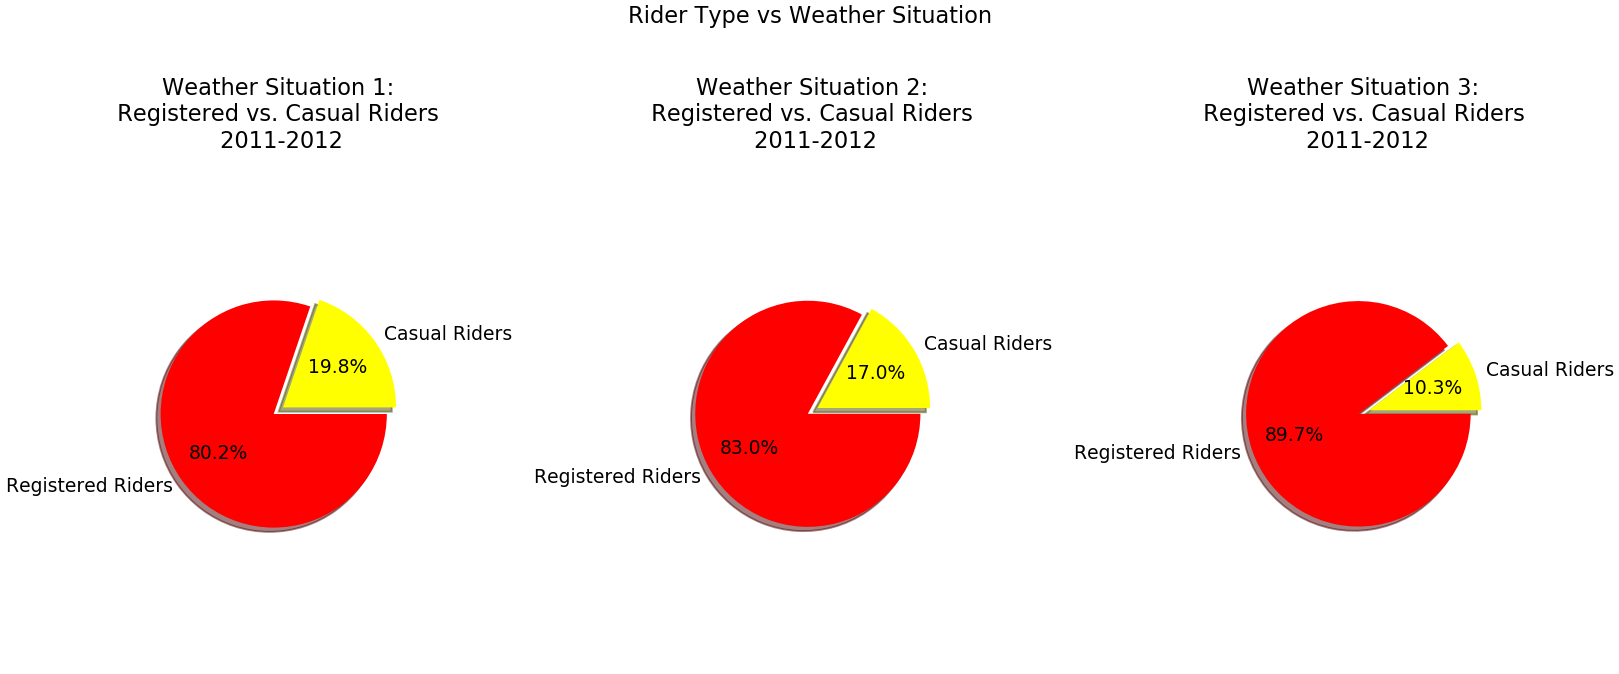

In [92]:
#weathersit_pie = just_one_bike.plot(kind="#", y=gender_list, title=("Trips of " + bike_id))

riders = ['Casual Riders', 'Registered Riders']
colors = ['yellow', 'red']
explode = (0.1, 0)


fig, plts = plt.subplots(1,3, figsize=(12,5), constrained_layout=True)
# plt.subplots_adjust(hspace=None)
fig.suptitle('Rider Type vs Weather Situation\n')

weathersits = [1,2,3]
for weathersit in weathersits:
    loopregistered = registered_weathersit[weathersit]
    loopcasual = casual_weathersit[weathersit]
    counts = [loopcasual, loopregistered]
    
#     autotexts= plts(counts, labels=riders, autopct='%.0f%%', textprops={'size': 'smaller'}, shadow=True, radius=0.5)

    plts[weathersit-1].pie(counts, explode=explode, labels=riders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)
    plts[weathersit-1].set_title(f'Weather Situation {weathersit}:\n Registered vs. Casual Riders \n 2011-2012')
    plts[weathersit-1].axis("equal")
        


plt.savefig('weathersit.png')

plt.show()


<IPython.core.display.Javascript object>


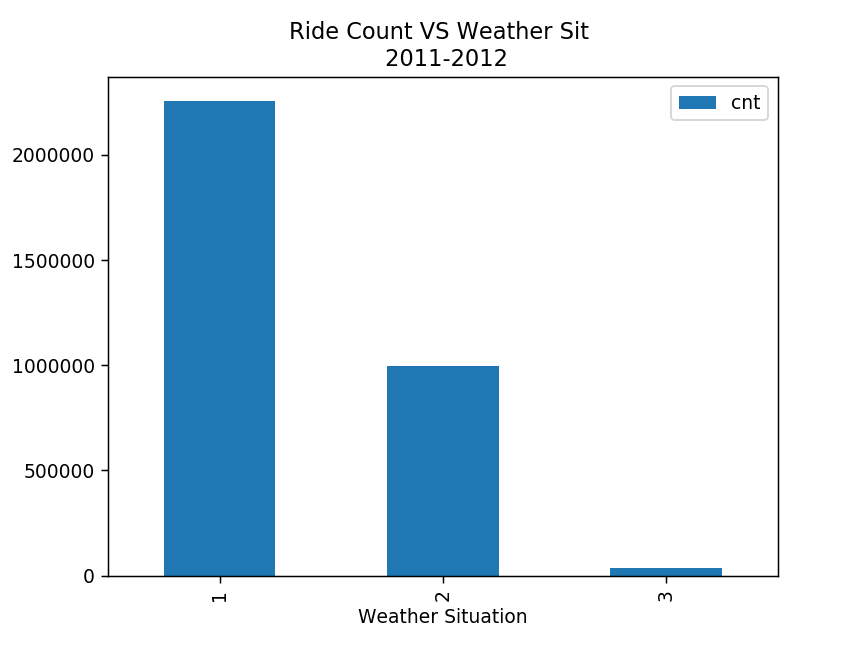

In [31]:
#barchart
bikedata_day_df[['weathersit', 'cnt']].groupby('weathersit').sum().plot(kind='bar')
plt.title("Ride Count VS Weather Sit \n 2011-2012")
plt.xlabel("Weather Situation")
plt.ylabel("Ride Count")
plt.savefig('ridecountvsweathersit.png')


<IPython.core.display.Javascript object>


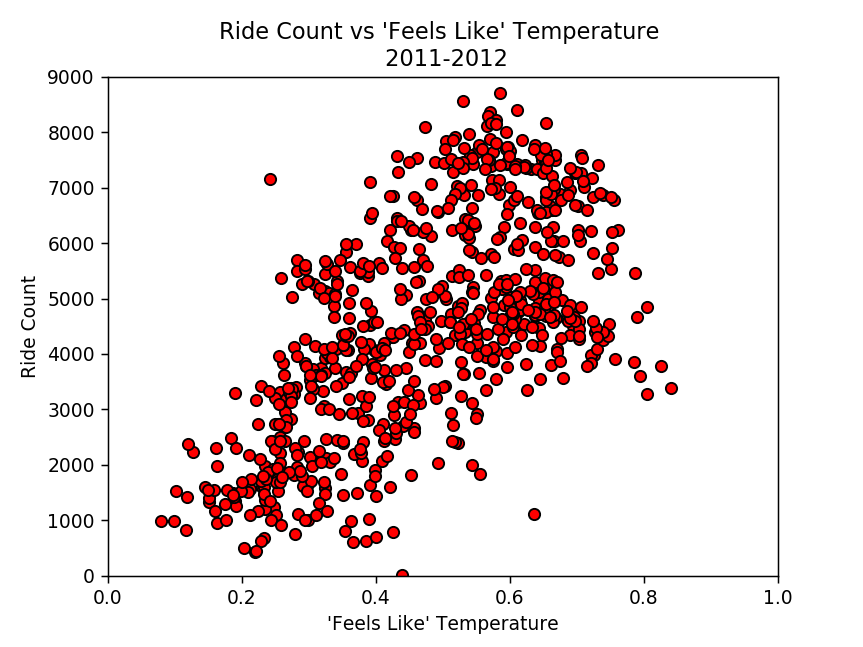

In [32]:
#ride count vs atemp

atemp = bikedata_day_df['atemp']
count = bikedata_day_df['cnt']

plt.figure(3)
plt.scatter(atemp, count, marker="o", facecolors="red", edgecolors="black")
plt.ylim(0,9000)
plt.xlim(0,1) 
plt.title("Ride Count vs 'Feels Like' Temperature \n 2011-2012")
plt.xlabel("'Feels Like' Temperature")
plt.ylabel("Ride Count")
plt.show()
plt.savefig('ridecountvsatemp.png')


In [33]:
bikedata2020_hour = '202001-capitalbikeshare-tripdata.csv'
bikedata2020_hour = pd.read_csv(bikedata_day)
bikedata2020_hour.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
